Getting Started

<br>

The aim of this analysis is to investigate a range of health-related factors and their interconnections **to classify diabetes accurately**. These factors include aspects such as **`age`**, **`gender`**, **`body mass index (BMI)`**, **`hypertension`**, **`heart disease`**, **`smoking history`**, **`HbA1c level`**, and **`blood glucose level`**. This comprehensive examination will not only provide insights into the patterns and trends in diabetes risk but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence diabetes occurrence and progression, crucial knowledge for improving patient care and outcomes in this increasingly critical area of healthcare.


### Domain Knowledge



1. **`Age`:** Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

2. **`Gender`**: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

3. **`Body Mass Index (BMI)`:** BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

4. **`Hypertension`:** Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

5. **`Heart Disease`:** Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

6. **`Smoking History`:** Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

7. **`HbA1c Level`:** HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.

8. **`Blood Glucose Level`:** Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

<br>

✔️ **These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's risk of developing diabetes.**

# <span style="color:#E888BB; font-size: 1%;">INTRODUCTION</span>
INTRODUCTION

<br>

### Preface

In this analysis, we have chosen the RandomForest classifier as our model. The RandomForest algorithm is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes for classification or mean prediction of the individual trees for regression.

Several reasons guided our choice of **<span style='color:#16C2D5'>Random Forest</span>** for this task:

1. **Handling of Large Data:** **<span style='color:#16C2D5'>Random Forest</span>** is capable of efficiently handling large datasets with high dimensionality. Our dataset, containing a substantial number of rows and several features, falls into this category.

2. **Robustness to Overfitting:** **<span style='color:#16C2D5'>Random Forest</span>** reduces the risk of overfitting, which is a common problem with decision trees. The algorithm accomplishes this by creating a set of **<mark style="background-color:#DDE6ED;color:black;border-radius:4px;opacity:1.0">decision trees</mark>** (a "forest") and making the final prediction based on the majority vote of the individual trees.

3. **Handling Mixed Data Types:** In our dataset, we have both numerical and categorical features. **<span style='color:#16C2D5'>Random Forest</span>** handles such mixtures smoothly, which makes it an ideal choice.

4. **Feature Importance:** **<span style='color:#16C2D5'>Random Forest</span>** provides a straightforward way to estimate feature importance. Given our aim to investigate the impact of different factors on diabetes, this characteristic is particularly useful.

5. **Non-linearity:** Medical data often contains complex and non-linear relationships. **<span style='color:#16C2D5'>Random Forest</span>**, being a non-linear model, can capture these relationships effectively.

<br>

> ⚠️ It's worth noting that while **<span style='color:#16C2D5'>Random Forest</span>** is a strong candidate given its mentioned advantages, the choice of model should always be considered with a grain of salt. Other models might perform better on the task, and it's generally a good practice to try several models and compare their performance. However, for the purpose of this analysis and given our dataset, **<span style='color:#16C2D5'>Random Forest</span>** **is a practical and reasonable starting point**.

<br>

### <b>II <span style='color:#16C2D5'>|</span> Import libraries</b>

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

### <b>III <span style='color:#16C2D5'>|</span> Input the data</b>

In [10]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


#  | EXPLORATORY DATA ANALYSIS
EXPLORATORY DATA ANALYSIS

## Data Quality

###  Handling Duplicates

In [12]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [13]:
df = df.drop_duplicates()

### <b>II <span style='color:#16C2D5'>|</span> Uniqueness</b>

In [14]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


### <b>III <span style='color:#16C2D5'>|</span> Missing Values</b>

In [15]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [16]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

### <b>IV <span style='color:#16C2D5'>|</span> Describe the Data</b>

In [17]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


##2. Univariate Analysis

### Histogram for age

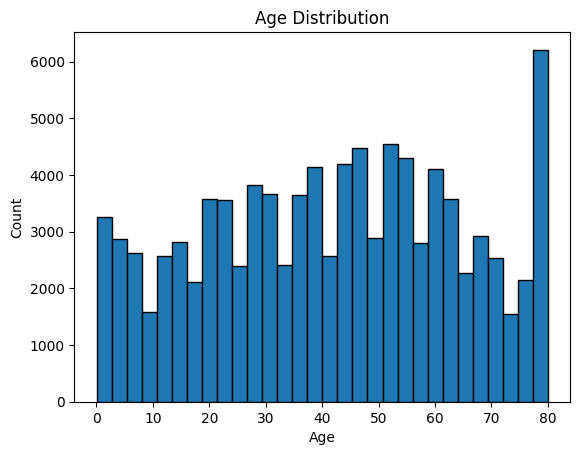

In [18]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Bar plot for gender</b>

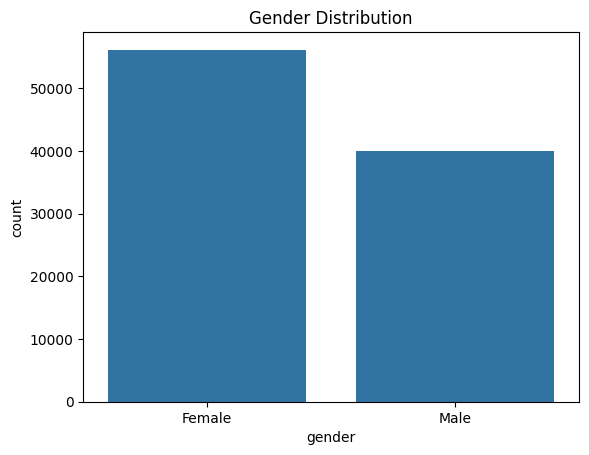

In [19]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

#  CORRELATION
 CORRELATION

###  Data preparation

In [20]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [21]:
df['smoking_history'].head()

0    non-smoker
1    non-smoker
2    non-smoker
3       current
4       current
Name: smoking_history, dtype: object

In [22]:
data = df.copy()

### <b>II <span style='color:#16C2D5'>|</span> Encoding</b>

In [23]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

### <b>III <span style='color:#16C2D5'>|</span> Correlation Matrix</b>

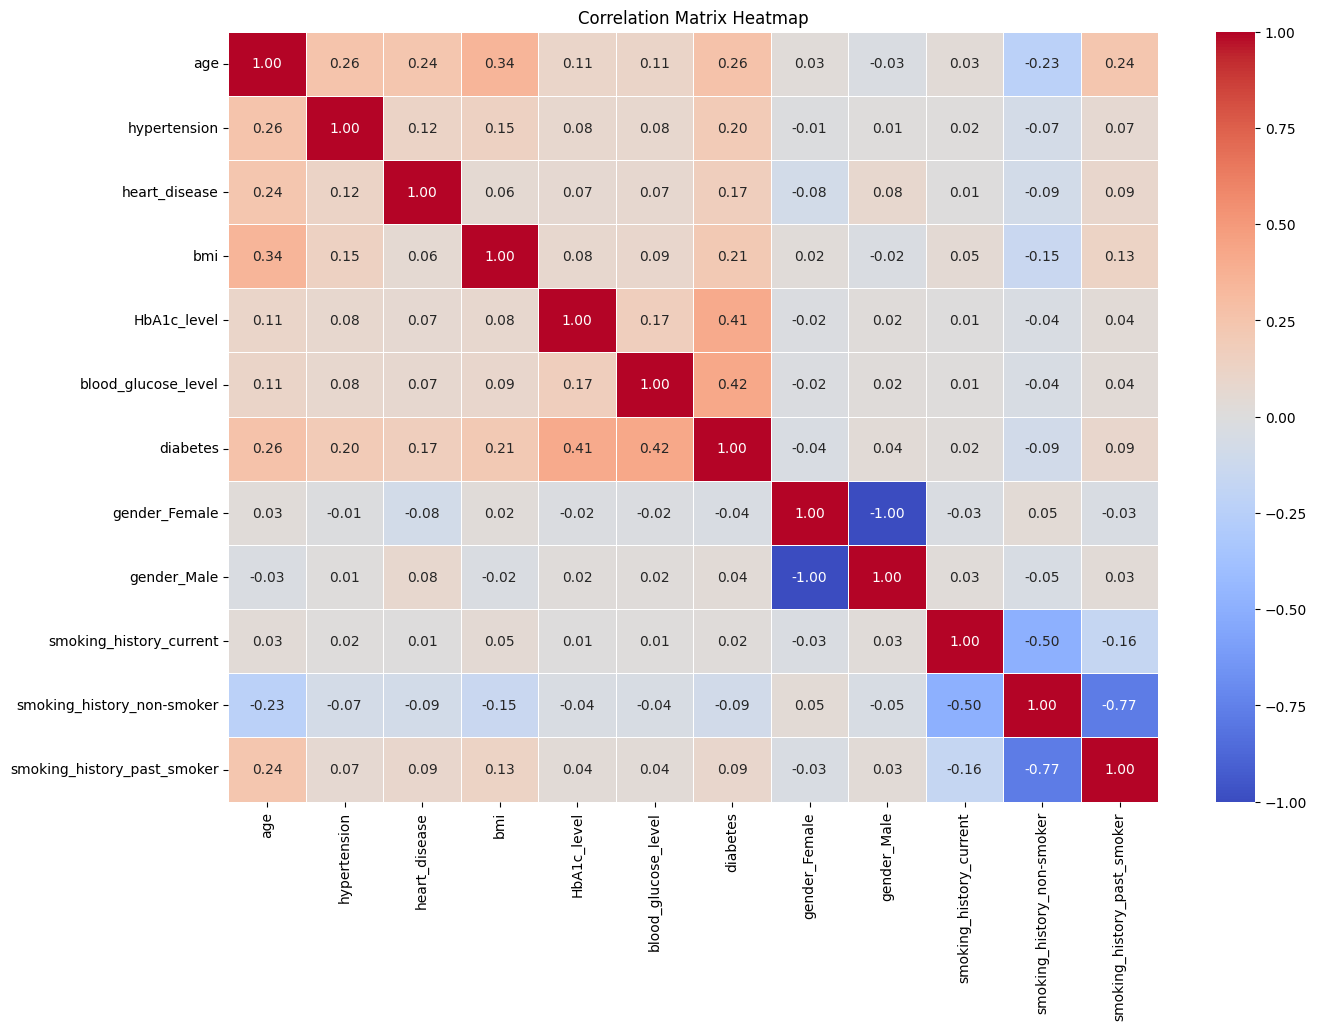

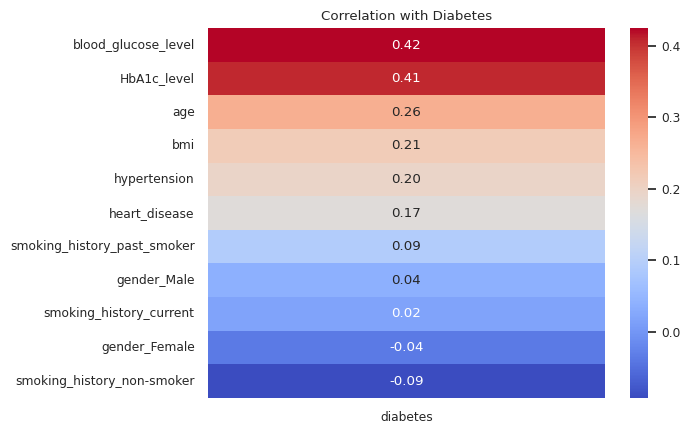

In [24]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

#  PREDICTIVE ANALYSIS
 PREDICTIVE ANALYSIS

## Class Imbalance

From the EDA ,the dataset is imbalanced (with 9% positive cases for diabetes and 91% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

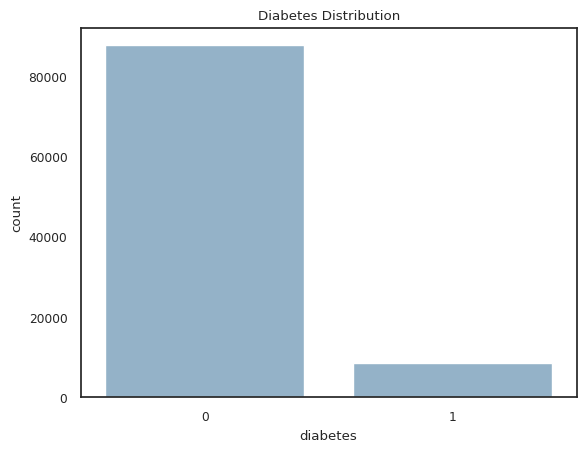

In [25]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [26]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

## 2.Preprocessing : Scaler

Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded.Standardization is not required for all models but is generally a good practice. One-hot encoding is necessary for categorical variables to be correctly understood by the machine learning model.

The StandardScaler in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.</p>

<p>In other words, given a feature vector <em>x</em>, it modifies the values as follows:</p>

<p class="formulaDsp">
\[ Y_i = \frac{x_i - \mu(\vec{x})}{\sigma(\vec{x})} \]
</p>

**where:**
<ul>
<li>\( x_i \) is the i-th element of the original feature vector \( \vec{x} \),</li>
<li>\( \mu(\vec{x}) \) is the mean of the feature vector, and</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>
</ul>

<p>The transformed data \( Y \) (each \( Y_i \)) will have properties such that \( mean(Y) = 0 \) and \( std(Y) = 1 \).</p>

> This transformation is also known as Z-score normalization.


In [27]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [28]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

## Model Building and Hyperparameter Tuning

A pipeline is constructed which first applies the preprocessing steps and then trains a model on the data. We use a **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">RandomForestClassifier</mark>**, which is a popular and powerful algorithm for classification tasks. The model's hyperparameters are tuned using **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">GridSearchCV</mark>** , which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on cross-validation.

In [29]:
# Define the hyperparameters and the values we want to test
param_grid = {
    #'classifier__n_estimators': [50, 100, 200],
    #'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [30]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}


### Intepret the results

The result shows the best parameters for our Random Forest model that were found during the hyperparameter tuning process:

1. **max_depth of 10:** This indicates that the maximum depth of the trees in the forest is 10 levels. Constraining the depth of the tree helps in reducing overfitting. It appears from this result that a medium-complexity tree works best for our data. Too much complexity (a deeper tree) may capture noise, and too little (a shallower tree) may not capture the underlying structure of the data.

2. **min_samples_leaf of 2:** This means that each leaf (the end node of a decision tree, where predictions are made) must contain at least two samples. This parameter, like max_depth, is a way to control overfitting. By requiring at least two samples to make a prediction, the model prevents fitting to outliers or noise in the training data.

3. **min_samples_split of 2:** This tells us that a node must contain at least two samples in order to be split (to create two child nodes). Similar to the min_samples_leaf parameter, this can help control overfitting.

4. **n_estimators of 50:** This is the number of decision trees in the forest. The Random Forest algorithm works by averaging the predictions of many decision trees to make a final prediction, which helps reduce overfitting and variance. In this case, it seems that having 50 trees in the forest gives us the best performance.

<br>


      These parameters are a result of the Hyperparameter tuning process , and they give us insight into the structure of the data and the complexity of the model that best captures that structure. The moderately constrained tree depth and the requirements for the number of samples at each node suggest a model that is complex enough to capture the important patterns in the data, but not so complex that it overfits to noise or outliers.This balance is crucial in creating a model that will generalize well to new data.



    
    

In [31]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Model Accuracy:  0.9411213981067305
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17525
           1       0.63      0.82      0.71      1701

    accuracy                           0.94     19226
   macro avg       0.81      0.88      0.84     19226
weighted avg       0.95      0.94      0.94     19226



In [32]:
X_test.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,Female,5.00,0,0,non-smoker,15.14,4.50,90
47513,Female,26.00,0,0,non-smoker,18.63,4.00,85


In [40]:
# Prepare custom data
custom_data = [
    ["Female", 35.0, 1, 0, "current", 28.2, 7.2, 130],
]

# Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

grid_search.predict(custom_df)


array([1])

In [38]:
!pip install -q -U google-generativeai

# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 18.9 MB/s eta 0:00:00


In [44]:
model = genai.GenerativeModel('gemini-pro')

import pandas as pd

# Define the custom data
custom_data = [
    ["Male", 45.0, 0, 0, "non-smoker", 25.6, 6.5, 110],
    ["Female", 35.0, 1, 0, "current", 28.2, 7.2, 130],
    ["Male",78.0,0,0,"non-smoker",27.32,6.6,126]
]

# Define the column names
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Function to generate suggestions based on prediction output
def generate_suggestion(index, data, prediction):
    input_text = ", ".join([f"{col}: {val}" for col, val in zip(columns, data)])
    if prediction == 0:
        return f"Patient {index}: You are not diabetic but still keep a healthy lifestyle to prevent future diagnosis."
    else:
        input_string = f"Patient {index}: Give me a suggestion for a patient with diabetes with data as follows: {input_text}"
        response = model.generate_content(input_string)
        return f"Patient {index}: {response.text}"

# Iterate through each patient data
for index, data in enumerate(custom_data, start=1):
    # Convert the data to pandas DataFrame
    custom_df = pd.DataFrame([data], columns=columns)

    # Predict using the grid search model
    prediction = grid_search.predict(custom_df)[0]

    # Generate the suggestion
    suggestion = generate_suggestion(index, data, prediction)
    print(suggestion)

Patient 1: You are not diabetic but still keep a healthy lifestyle to prevent future diagnosis.
Patient 2: **Medication:**

* **Metformin:** 500 mg twice daily to improve insulin sensitivity and lower blood glucose levels.

**Lifestyle Modifications:**

* **Weight loss:** Aim for a BMI of 25 or less. Encourage a calorie-controlled diet with a focus on fruits, vegetables, whole grains, and lean protein.
* **Regular exercise:** Engage in at least 150 minutes of moderate-intensity exercise or 75 minutes of vigorous-intensity exercise weekly to improve insulin sensitivity.
* **Smoking cessation:** Quitting smoking will reduce inflammation and improve cardiovascular health.
* **Diabetes self-management education:** Provide resources to educate the patient about diabetes, blood glucose monitoring, medication adherence, and healthy lifestyle choices.

**Monitoring:**

* **Monitor blood glucose levels:** Check blood glucose levels regularly as per doctor's instructions.
* **HbA1c monitoring:**